# CMS Outpatient Claims Analysis
## Comprehensive EDA, Data Cleaning & Healthcare Insights

---

### Dataset Overview
The CMS Outpatient Claims DE-SynPUF dataset contains **76 variables** representing synthetic outpatient healthcare claims. Each record pertains to an outpatient service including:
- **Doctor visits and consultations**
- **Diagnostic tests and imaging**
- **Laboratory services**
- **Outpatient surgeries and procedures**
- **Emergency room visits (non-admit)**
- **Physical therapy and rehabilitation**
- **Preventive care services**

### Key Business Questions:
1. What are the most common outpatient services and their cost patterns?
2. How do outpatient costs compare across providers and service types?
3. What are the patterns in preventive care utilization?
4. Can we identify high-cost outpatient users?
5. What temporal patterns exist in outpatient service utilization?

---

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")
print("="*80)
print("🏥 CMS OUTPATIENT CLAIMS ANALYSIS")
print("="*80)

✓ Libraries imported successfully
🏥 CMS OUTPATIENT CLAIMS ANALYSIS


## 1. Data Loading & Initial Exploration

In [2]:
# Load the dataset
# Update this path to your actual file location
df = pd.read_csv('DE1_0_2008_to_2010_Outpatient_Claims_Sample_20.csv', low_memory=False)

print(f"📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"📅 Date Range: 2008-2010 (Outpatient Services)")

📊 Dataset Shape: 790,044 rows × 76 columns
💾 Memory Usage: 1746.67 MB
📅 Date Range: 2008-2010 (Outpatient Services)


In [3]:
# Display first rows
print("\n🔍 First 5 Rows:")
df.head()


🔍 First 5 Rows:


,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00001C24EE7B06AC,684562269783396,1,20090404.0,20090404.0,1100SK,200.0,0.0,1.298827e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00001C24EE7B06AC,684012269893042,1,20100310.0,20100310.0,1100SK,500.0,0.0,1.298827e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000072CF62193213,684012269540703,1,20080130.0,20080130.0,1000AH,50.0,0.0,8.929521e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000072CF62193213,684472269696971,1,20080301.0,20080301.0,1000AH,70.0,0.0,8.382688e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000072CF62193213,684122269778934,1,20080322.0,20080322.0,3400HK,40.0,0.0,4.404237e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Column information
print("\n📋 Dataset Information:")
df.info()


📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790044 entries, 0 to 790043
Data columns (total 76 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DESYNPUF_ID                     790044 non-null  object 
 1   CLM_ID                          790044 non-null  int64  
 2   SEGMENT                         790044 non-null  int64  
 3   CLM_FROM_DT                     779016 non-null  float64
 4   CLM_THRU_DT                     779016 non-null  float64
 5   PRVDR_NUM                       790044 non-null  object 
 6   CLM_PMT_AMT                     790044 non-null  float64
 7   NCH_PRMRY_PYR_CLM_PD_AMT        790044 non-null  float64
 8   AT_PHYSN_NPI                    772604 non-null  float64
 9   OP_PHYSN_NPI                    133737 non-null  float64
 10  OT_PHYSN_NPI                    255940 non-null  float64
 11  NCH_BENE_BLOOD_DDCTBL_LBLTY_AM  790044 non-null  float

In [5]:
# Statistical summary
print("\n📈 Statistical Summary:")
df.describe()


📈 Statistical Summary:


,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,ICD9_PRCDR_CD_1,NCH_BENE_PTB_DDCTBL_AMT,NCH_BENE_PTB_COINSRNC_AMT,HCPCS_CD_45
count,7.900440e+05,790044.000000,7.790160e+05,7.790160e+05,790044.000000,790044.000000,7.726040e+05,1.337370e+05,2.559400e+05,790044.000000,205.000000,790044.000000,790044.000000,0.0
mean,6.845019e+14,1.013959,2.008923e+07,2.008927e+07,282.599096,10.425976,4.973535e+09,4.939105e+09,4.902958e+09,0.008227,6253.082927,2.812843,83.796118,NaN
std,2.858064e+11,0.117320,7.473580e+03,7.470445e+03,569.602877,235.285339,2.877391e+09,2.885570e+09,2.891626e+09,2.028209,3000.040882,15.512668,178.725958,NaN
min,6.840123e+14,1.000000,2.007121e+07,2.008010e+07,-100.000000,0.000000,1.024080e+05,1.005544e+06,1.024080e+05,0.000000,54.000000,0.000000,0.000000,NaN
25%,6.842523e+14,1.000000,2.008092e+07,2.008092e+07,40.000000,0.000000,2.520575e+09,2.469459e+09,2.437455e+09,0.000000,3893.000000,0.000000,0.000000,NaN
50%,6.845023e+14,1.000000,2.009042e+07,2.009043e+07,80.000000,0.000000,4.905258e+09,4.866312e+09,4.781420e+09,0.000000,5551.000000,0.000000,20.000000,NaN
75%,6.847523e+14,1.000000,2.009120e+07,2.009120e+07,200.000000,0.000000,7.505951e+09,7.470920e+09,7.494005e+09,0.000000,8962.000000,0.000000,70.000000,NaN
max,6.849923e+14,2.000000,2.010123e+07,2.010123e+07,3300.000000,14000.000000,9.999658e+09,9.999615e+09,9.999886e+09,900.000000,9955.000000,200.000000,1100.000000,NaN


## 2. Data Quality Assessment & Missing Value Analysis

In [28]:
# Comprehensive data quality report
def create_data_quality_report(dataframe):
    """
    Generate comprehensive data quality metrics
    """
    report = pd.DataFrame({
        'Column': dataframe.columns,
        'Data_Type': dataframe.dtypes.values,
        'Missing_Count': dataframe.isnull().sum().values,
        'Missing_Percentage': (dataframe.isnull().sum() / len(dataframe) * 100).values,
        'Unique_Values': [dataframe[col].nunique() for col in dataframe.columns],
        'Sample_Values': [str(dataframe[col].dropna().head(2).tolist())[:50] for col in dataframe.columns]
    })
    
    report['Missing_Percentage'] = report['Missing_Percentage'].round(2)
    report = report.sort_values('Missing_Percentage', ascending=False)
    
    return report

quality_report = create_data_quality_report(df)
print("\n🔍 DATA QUALITY REPORT (Sorted by Missing %)")
print("="*100)
display(quality_report.head(30))


🔍 DATA QUALITY REPORT (Sorted by Missing %)


,Column,Data_Type,Missing_Count,Missing_Percentage,Unique_Values,Sample_Values
75,HCPCS_CD_45,float64,790044,100.00,0,[]
26,ICD9_PRCDR_CD_5,object,790026,100.00,16,"['5781', '4359']"
27,ICD9_PRCDR_CD_6,object,790030,100.00,14,"['V1209', 'V7644']"
25,ICD9_PRCDR_CD_4,object,790018,100.00,25,"['2724', '4539']"
24,ICD9_PRCDR_CD_3,object,789991,99.99,48,"['4019', 'V1005']"
23,ICD9_PRCDR_CD_2,object,789936,99.99,82,"['27651', '29680']"
22,ICD9_PRCDR_CD_1,float64,789839,99.97,107,"[8607.0, 9955.0]"
21,ICD9_DGNS_CD_10,object,788446,99.80,620,"['71946', '79431']"
74,HCPCS_CD_44,object,779650,98.68,588,"['97110', '97530']"
73,HCPCS_CD_43,object,779052,98.61,603,"['97530', '97110']"


In [7]:
# Identify columns with >30% missing data (to be removed per user requirement)
columns_to_remove = quality_report[quality_report['Missing_Percentage'] > 30]['Column'].tolist()

print("\n⚠️ COLUMNS WITH >30% MISSING DATA (TO BE REMOVED):")
print("="*100)
print(f"Total columns to remove: {len(columns_to_remove)}")
print("\nList of columns:")
for i, col in enumerate(columns_to_remove, 1):
    missing_pct = quality_report[quality_report['Column'] == col]['Missing_Percentage'].values[0]
    print(f"  {i:2d}. {col:30s} - {missing_pct:.1f}% missing")


⚠️ COLUMNS WITH >30% MISSING DATA (TO BE REMOVED):
Total columns to remove: 62

List of columns:
   1. HCPCS_CD_45                    - 100.0% missing
   2. ICD9_PRCDR_CD_5                - 100.0% missing
   3. ICD9_PRCDR_CD_6                - 100.0% missing
   4. ICD9_PRCDR_CD_4                - 100.0% missing
   5. ICD9_PRCDR_CD_3                - 100.0% missing
   6. ICD9_PRCDR_CD_2                - 100.0% missing
   7. ICD9_PRCDR_CD_1                - 100.0% missing
   8. ICD9_DGNS_CD_10                - 99.8% missing
   9. HCPCS_CD_44                    - 98.7% missing
  10. HCPCS_CD_43                    - 98.6% missing
  11. HCPCS_CD_42                    - 98.5% missing
  12. HCPCS_CD_41                    - 98.4% missing
  13. HCPCS_CD_40                    - 98.3% missing
  14. HCPCS_CD_39                    - 98.2% missing
  15. HCPCS_CD_38                    - 98.1% missing
  16. HCPCS_CD_37                    - 98.0% missing
  17. HCPCS_CD_36                    - 97.9% mi

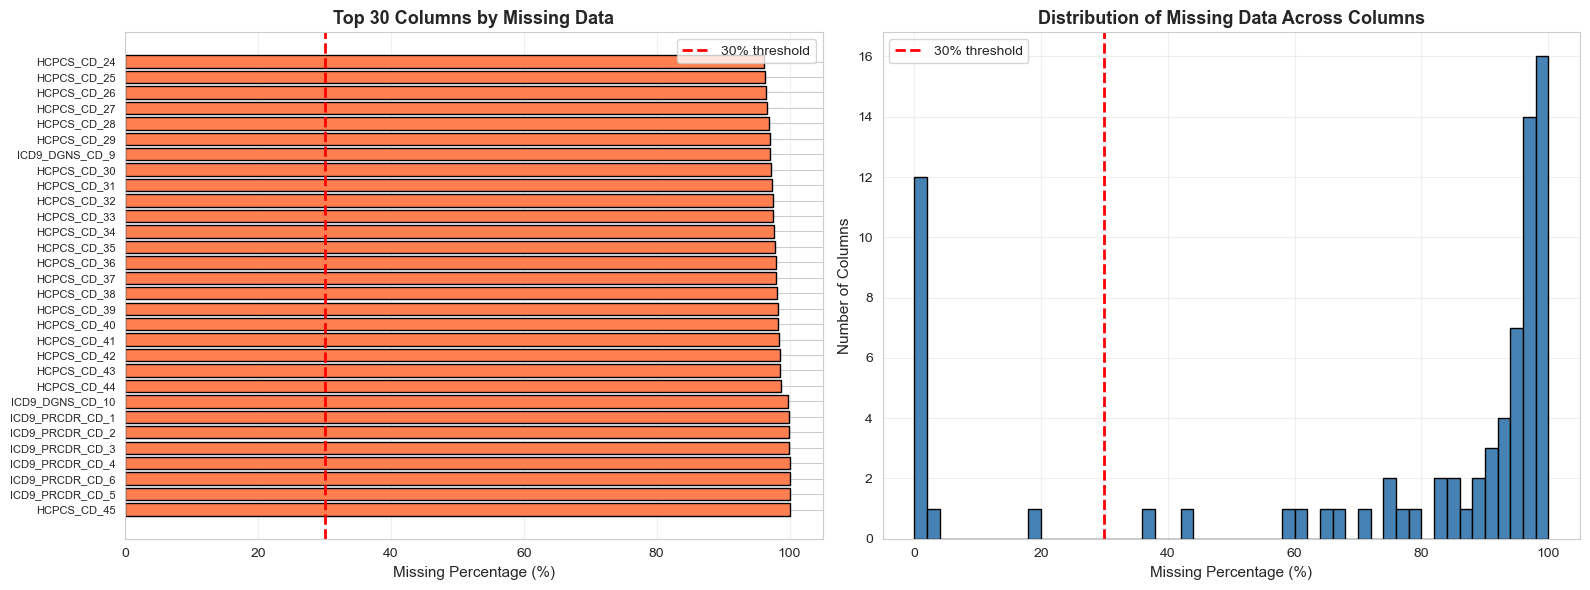

In [8]:
# Visualize missing data before removal
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 30 columns by missing percentage
top_missing = quality_report.head(30)
axes[0].barh(range(len(top_missing)), top_missing['Missing_Percentage'].values, color='coral', edgecolor='black')
axes[0].set_yticks(range(len(top_missing)))
axes[0].set_yticklabels(top_missing['Column'].values, fontsize=8)
axes[0].axvline(x=30, color='red', linestyle='--', linewidth=2, label='30% threshold')
axes[0].set_xlabel('Missing Percentage (%)', fontsize=11)
axes[0].set_title('Top 30 Columns by Missing Data', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# Distribution of missing percentages
axes[1].hist(quality_report['Missing_Percentage'], bins=50, edgecolor='black', color='steelblue')
axes[1].axvline(x=30, color='red', linestyle='--', linewidth=2, label='30% threshold')
axes[1].set_xlabel('Missing Percentage (%)', fontsize=11)
axes[1].set_ylabel('Number of Columns', fontsize=11)
axes[1].set_title('Distribution of Missing Data Across Columns', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Data Cleaning & Preprocessing

In [9]:
# Create a copy for cleaning
df_clean = df.copy()

print("🧹 Starting Data Cleaning Process...")
print("="*100)
print(f"Original shape: {df_clean.shape}")

🧹 Starting Data Cleaning Process...
Original shape: (790044, 76)


### 3.1 Remove Columns with >30% Missing Data

In [29]:
# Remove columns with >30% missing data
print(f"\n🗑️ Removing {len(columns_to_remove)} columns with >30% missing data...")
df_clean = df_clean.drop(columns=columns_to_remove)

print(f"✓ Columns removed successfully")
print(f"New shape: {df_clean.shape}")
print(f"Columns removed: {len(columns_to_remove)}")
print(f"Columns retained: {df_clean.shape[1]}")


🗑️ Removing 62 columns with >30% missing data...


KeyError: "['HCPCS_CD_45', 'ICD9_PRCDR_CD_5', 'ICD9_PRCDR_CD_6', 'ICD9_PRCDR_CD_4', 'ICD9_PRCDR_CD_3', 'ICD9_PRCDR_CD_2', 'ICD9_PRCDR_CD_1', 'ICD9_DGNS_CD_10', 'HCPCS_CD_44', 'HCPCS_CD_43', 'HCPCS_CD_42', 'HCPCS_CD_41', 'HCPCS_CD_40', 'HCPCS_CD_39', 'HCPCS_CD_38', 'HCPCS_CD_37', 'HCPCS_CD_36', 'HCPCS_CD_35', 'HCPCS_CD_34', 'HCPCS_CD_33', 'HCPCS_CD_32', 'HCPCS_CD_31', 'HCPCS_CD_30', 'ICD9_DGNS_CD_9', 'HCPCS_CD_29', 'HCPCS_CD_28', 'HCPCS_CD_27', 'HCPCS_CD_26', 'HCPCS_CD_25', 'HCPCS_CD_24', 'HCPCS_CD_23', 'ICD9_DGNS_CD_8', 'HCPCS_CD_22', 'HCPCS_CD_21', 'HCPCS_CD_20', 'HCPCS_CD_19', 'HCPCS_CD_18', 'ICD9_DGNS_CD_7', 'HCPCS_CD_17', 'HCPCS_CD_16', 'HCPCS_CD_15', 'HCPCS_CD_14', 'ICD9_DGNS_CD_6', 'HCPCS_CD_13', 'HCPCS_CD_12', 'HCPCS_CD_11', 'HCPCS_CD_10', 'ICD9_DGNS_CD_5', 'HCPCS_CD_9', 'OP_PHYSN_NPI', 'HCPCS_CD_8', 'HCPCS_CD_7', 'HCPCS_CD_6', 'ICD9_DGNS_CD_4', 'ADMTNG_ICD9_DGNS_CD', 'HCPCS_CD_5', 'OT_PHYSN_NPI', 'HCPCS_CD_4', 'ICD9_DGNS_CD_3', 'HCPCS_CD_3', 'HCPCS_CD_2', 'ICD9_DGNS_CD_2'] not found in axis"

### 3.2 Fix Scientific Notation in Claim IDs

In [ ]:
# Fix CLM_ID scientific notation issue
if 'CLM_ID' in df_clean.columns:
    print("\n📝 Fixing Claim ID scientific notation...")
    print(f"Before: {df_clean['CLM_ID'].head(3).tolist()}")
    
    df_clean['CLM_ID'] = df_clean['CLM_ID'].apply(
        lambda x: f"{int(x):015d}" if pd.notna(x) else None
    )
    
    print(f"After: {df_clean['CLM_ID'].head(3).tolist()}")
    print("✓ Claim IDs converted to proper format")

### 3.3 Convert Date Columns

In [ ]:
# Convert date columns
date_columns = ['CLM_FROM_DT', 'CLM_THRU_DT']

def convert_date(date_value):
    """Convert YYYYMMDD integer to datetime"""
    if pd.isna(date_value):
        return None
    try:
        date_str = str(int(date_value))
        return pd.to_datetime(date_str, format='%Y%m%d')
    except:
        return None

print("\n📅 Converting date columns...")
for col in date_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].apply(convert_date)
        print(f"✓ {col} converted to datetime")

# Display date range
if 'CLM_FROM_DT' in df_clean.columns and df_clean['CLM_FROM_DT'].notna().any():
    min_date = df_clean['CLM_FROM_DT'].min()
    max_date = df_clean['CLM_FROM_DT'].max()
    print(f"\n📊 Date Range: {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")
    print(f"📊 Span: {(max_date - min_date).days} days ({(max_date - min_date).days/365:.1f} years)")

### 3.4 Create Derived Features

In [13]:
print("\n🔧 Creating Derived Features...")
print("="*100)

# Calculate service duration
if all(col in df_clean.columns for col in ['CLM_FROM_DT', 'CLM_THRU_DT']):
    df_clean['SERVICE_DURATION_DAYS'] = (
        df_clean['CLM_THRU_DT'] - df_clean['CLM_FROM_DT']
    ).dt.days
    print("✓ SERVICE_DURATION_DAYS created")

# Extract temporal features
if 'CLM_FROM_DT' in df_clean.columns and df_clean['CLM_FROM_DT'].notna().any():
    df_clean['SERVICE_YEAR'] = df_clean['CLM_FROM_DT'].dt.year
    df_clean['SERVICE_MONTH'] = df_clean['CLM_FROM_DT'].dt.month
    df_clean['SERVICE_QUARTER'] = df_clean['CLM_FROM_DT'].dt.quarter
    df_clean['SERVICE_DAY_OF_WEEK'] = df_clean['CLM_FROM_DT'].dt.dayofweek
    df_clean['SERVICE_MONTH_NAME'] = df_clean['CLM_FROM_DT'].dt.month_name()
    print("✓ Temporal features created (YEAR, MONTH, QUARTER, DAY_OF_WEEK)")

# Count diagnosis codes
diagnosis_cols = [col for col in df_clean.columns if 'ICD9_DGNS_CD' in col and col != 'ADMTNG_ICD9_DGNS_CD']
if len(diagnosis_cols) > 0:
    df_clean['NUM_DIAGNOSES'] = df_clean[diagnosis_cols].notna().sum(axis=1)
    print(f"✓ NUM_DIAGNOSES created (from {len(diagnosis_cols)} diagnosis columns)")

# Count procedure codes
procedure_cols = [col for col in df_clean.columns if 'ICD9_PRCDR_CD' in col]
if len(procedure_cols) > 0:
    df_clean['NUM_PROCEDURES'] = df_clean[procedure_cols].notna().sum(axis=1)
    print(f"✓ NUM_PROCEDURES created (from {len(procedure_cols)} procedure columns)")

# Count HCPCS codes (outpatient-specific procedures)
hcpcs_cols = [col for col in df_clean.columns if 'HCPCS_CD' in col]
if len(hcpcs_cols) > 0:
    df_clean['NUM_HCPCS_CODES'] = df_clean[hcpcs_cols].notna().sum(axis=1)
    print(f"✓ NUM_HCPCS_CODES created (from {len(hcpcs_cols)} HCPCS columns)")

# Patient financial responsibility
if all(col in df_clean.columns for col in ['NCH_BENE_PTB_DDCTBL_AMT', 'NCH_BENE_PTB_COINSRNC_AMT']):
    df_clean['TOTAL_PATIENT_RESPONSIBILITY'] = (
        df_clean['NCH_BENE_PTB_DDCTBL_AMT'].fillna(0) + 
        df_clean['NCH_BENE_PTB_COINSRNC_AMT'].fillna(0)
    )
    print("✓ TOTAL_PATIENT_RESPONSIBILITY created")

# Same-day service flag
if 'SERVICE_DURATION_DAYS' in df_clean.columns:
    df_clean['IS_SAME_DAY_SERVICE'] = (df_clean['SERVICE_DURATION_DAYS'] == 0).astype(int)
    print("✓ IS_SAME_DAY_SERVICE flag created")

# Number of physicians involved
physician_cols = ['AT_PHYSN_NPI', 'OP_PHYSN_NPI', 'OT_PHYSN_NPI']
physician_cols = [col for col in physician_cols if col in df_clean.columns]
if len(physician_cols) > 0:
    df_clean['NUM_PHYSICIANS'] = df_clean[physician_cols].notna().sum(axis=1)
    print("✓ NUM_PHYSICIANS created")

# Cost flags
if 'CLM_PMT_AMT' in df_clean.columns:
    df_clean['ZERO_COST_FLAG'] = (df_clean['CLM_PMT_AMT'] == 0).astype(int)
    df_clean['NEGATIVE_COST_FLAG'] = (df_clean['CLM_PMT_AMT'] < 0).astype(int)
    high_cost_threshold = df_clean['CLM_PMT_AMT'].quantile(0.95)
    df_clean['HIGH_COST_FLAG'] = (df_clean['CLM_PMT_AMT'] >= high_cost_threshold).astype(int)
    print(f"✓ Cost flags created (ZERO_COST, NEGATIVE_COST, HIGH_COST > ${high_cost_threshold:.2f})")

print("\n✅ Feature engineering complete!")


🔧 Creating Derived Features...
✓ SERVICE_DURATION_DAYS created
✓ Temporal features created (YEAR, MONTH, QUARTER, DAY_OF_WEEK)
✓ NUM_DIAGNOSES created (from 1 diagnosis columns)
✓ NUM_HCPCS_CODES created (from 1 HCPCS columns)
✓ TOTAL_PATIENT_RESPONSIBILITY created
✓ IS_SAME_DAY_SERVICE flag created
✓ NUM_PHYSICIANS created
✓ Cost flags created (ZERO_COST, NEGATIVE_COST, HIGH_COST > $1600.00)

✅ Feature engineering complete!


### 3.5 Categorize Primary Diagnosis

In [14]:
# Categorize ICD9 diagnosis codes
def categorize_icd9_diagnosis(code):
    """
    Categorize ICD9 diagnosis codes into broad categories
    """
    if pd.isna(code):
        return 'Unknown'
    
    try:
        if isinstance(code, str) and code[0].isalpha():
            if code.startswith('V'):
                return 'V-Codes (Supplementary)'
            elif code.startswith('E'):
                return 'E-Codes (External Causes)'
        
        code_num = float(str(code).replace('.', ''))
        
        if 1 <= code_num < 140:
            return 'Infectious and Parasitic'
        elif 140 <= code_num < 240:
            return 'Neoplasms'
        elif 240 <= code_num < 280:
            return 'Endocrine/Nutritional/Metabolic'
        elif 280 <= code_num < 290:
            return 'Blood and Blood-Forming Organs'
        elif 290 <= code_num < 320:
            return 'Mental Disorders'
        elif 320 <= code_num < 390:
            return 'Nervous System'
        elif 390 <= code_num < 460:
            return 'Circulatory System'
        elif 460 <= code_num < 520:
            return 'Respiratory System'
        elif 520 <= code_num < 580:
            return 'Digestive System'
        elif 580 <= code_num < 630:
            return 'Genitourinary System'
        elif 630 <= code_num < 680:
            return 'Pregnancy/Childbirth'
        elif 680 <= code_num < 710:
            return 'Skin and Subcutaneous'
        elif 710 <= code_num < 740:
            return 'Musculoskeletal'
        elif 740 <= code_num < 760:
            return 'Congenital Anomalies'
        elif 760 <= code_num < 780:
            return 'Perinatal Period'
        elif 780 <= code_num < 800:
            return 'Symptoms/Signs/Ill-Defined'
        elif 800 <= code_num < 1000:
            return 'Injury and Poisoning'
        else:
            return 'Other'
    except:
        return 'Unknown'

if 'ICD9_DGNS_CD_1' in df_clean.columns:
    print("\n🏥 Categorizing primary diagnosis codes...")
    df_clean['PRIMARY_DIAGNOSIS_CATEGORY'] = df_clean['ICD9_DGNS_CD_1'].apply(categorize_icd9_diagnosis)
    print("✓ PRIMARY_DIAGNOSIS_CATEGORY created")


🏥 Categorizing primary diagnosis codes...
✓ PRIMARY_DIAGNOSIS_CATEGORY created


In [15]:
# Summary of cleaning
print("\n" + "="*100)
print("📊 DATA CLEANING SUMMARY")
print("="*100)
print(f"Original columns: {df.shape[1]}")
print(f"Columns removed (>30% missing): {len(columns_to_remove)}")
print(f"Final columns: {df_clean.shape[1]}")
print(f"New derived features: {df_clean.shape[1] - (df.shape[1] - len(columns_to_remove))}")
print(f"\nOriginal rows: {df.shape[0]:,}")
print(f"Final rows: {df_clean.shape[0]:,}")
print(f"Rows removed: 0 (no row-level filtering applied)")


📊 DATA CLEANING SUMMARY
Original columns: 76
Columns removed (>30% missing): 62
Final columns: 29
New derived features: 15

Original rows: 790,044
Final rows: 790,044
Rows removed: 0 (no row-level filtering applied)


## 4. Exploratory Data Analysis (EDA)

### 4.1 Service Volume Analysis

In [16]:
# Basic service statistics
print("\n📊 OUTPATIENT SERVICE VOLUME STATISTICS")
print("="*100)

total_services = len(df_clean)
unique_patients = df_clean['DESYNPUF_ID'].nunique() if 'DESYNPUF_ID' in df_clean.columns else 0
unique_providers = df_clean['PRVDR_NUM'].nunique() if 'PRVDR_NUM' in df_clean.columns else 0

print(f"Total Outpatient Services: {total_services:,}")
print(f"Unique Patients: {unique_patients:,}")
print(f"Unique Providers: {unique_providers:,}")
if unique_patients > 0:
    print(f"Average Services per Patient: {total_services/unique_patients:.2f}")

# Same-day services
if 'IS_SAME_DAY_SERVICE' in df_clean.columns:
    same_day_count = df_clean['IS_SAME_DAY_SERVICE'].sum()
    same_day_pct = same_day_count / total_services * 100
    print(f"\nSame-day Services: {same_day_count:,} ({same_day_pct:.1f}%)")
    print("Note: Most outpatient services are same-day (doctor visits, tests, procedures)")


📊 OUTPATIENT SERVICE VOLUME STATISTICS
Total Outpatient Services: 790,044
Unique Patients: 85,159
Unique Providers: 6,307
Average Services per Patient: 9.28

Same-day Services: 684,840 (86.7%)
Note: Most outpatient services are same-day (doctor visits, tests, procedures)


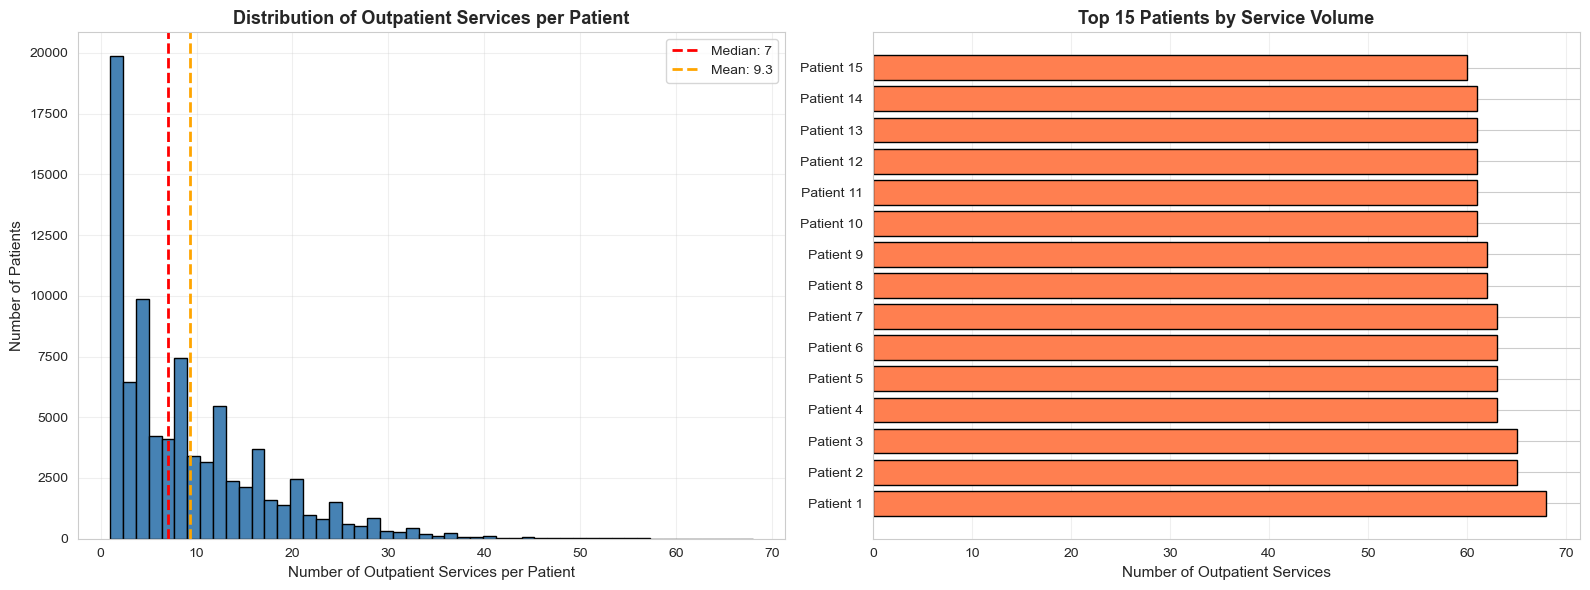


📊 Service Distribution:
   Median services per patient: 7
   Mean services per patient: 9.28
   Max services by single patient: 68

🎯 High Utilizers (Top 10%):
   Number: 8,753
   Minimum services to be in top 10%: 21
   These patients account for 238,049 services (30.1%)


In [17]:
# Patient service frequency
if 'DESYNPUF_ID' in df_clean.columns:
    patient_service_count = df_clean['DESYNPUF_ID'].value_counts()
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Distribution of services per patient
    axes[0].hist(patient_service_count.values, bins=50, edgecolor='black', color='steelblue')
    axes[0].axvline(patient_service_count.median(), color='red', linestyle='--', 
                    linewidth=2, label=f'Median: {patient_service_count.median():.0f}')
    axes[0].axvline(patient_service_count.mean(), color='orange', linestyle='--', 
                    linewidth=2, label=f'Mean: {patient_service_count.mean():.1f}')
    axes[0].set_xlabel('Number of Outpatient Services per Patient', fontsize=11)
    axes[0].set_ylabel('Number of Patients', fontsize=11)
    axes[0].set_title('Distribution of Outpatient Services per Patient', fontsize=13, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Top 15 patients
    top_15_patients = patient_service_count.head(15)
    axes[1].barh(range(len(top_15_patients)), top_15_patients.values, color='coral', edgecolor='black')
    axes[1].set_yticks(range(len(top_15_patients)))
    axes[1].set_yticklabels([f'Patient {i+1}' for i in range(len(top_15_patients))])
    axes[1].set_xlabel('Number of Outpatient Services', fontsize=11)
    axes[1].set_title('Top 15 Patients by Service Volume', fontsize=13, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Service Distribution:")
    print(f"   Median services per patient: {patient_service_count.median():.0f}")
    print(f"   Mean services per patient: {patient_service_count.mean():.2f}")
    print(f"   Max services by single patient: {patient_service_count.max()}")
    
    # High utilizers
    high_util_threshold = patient_service_count.quantile(0.9)
    high_utilizers = patient_service_count[patient_service_count >= high_util_threshold]
    print(f"\n🎯 High Utilizers (Top 10%):")
    print(f"   Number: {len(high_utilizers):,}")
    print(f"   Minimum services to be in top 10%: {high_util_threshold:.0f}")
    print(f"   These patients account for {high_utilizers.sum():,} services ({high_utilizers.sum()/total_services*100:.1f}%)")

### 4.2 Cost Analysis


💰 OUTPATIENT COST ANALYSIS

Payment Amount Statistics:
   Mean: $282.60
   Median: $80.00
   Std Dev: $569.60
   Min: $-100.00
   Max: $3,300.00

💵 Total Outpatient Spending: $223,265,720.00
💵 Average Spending per Patient: $2,621.75


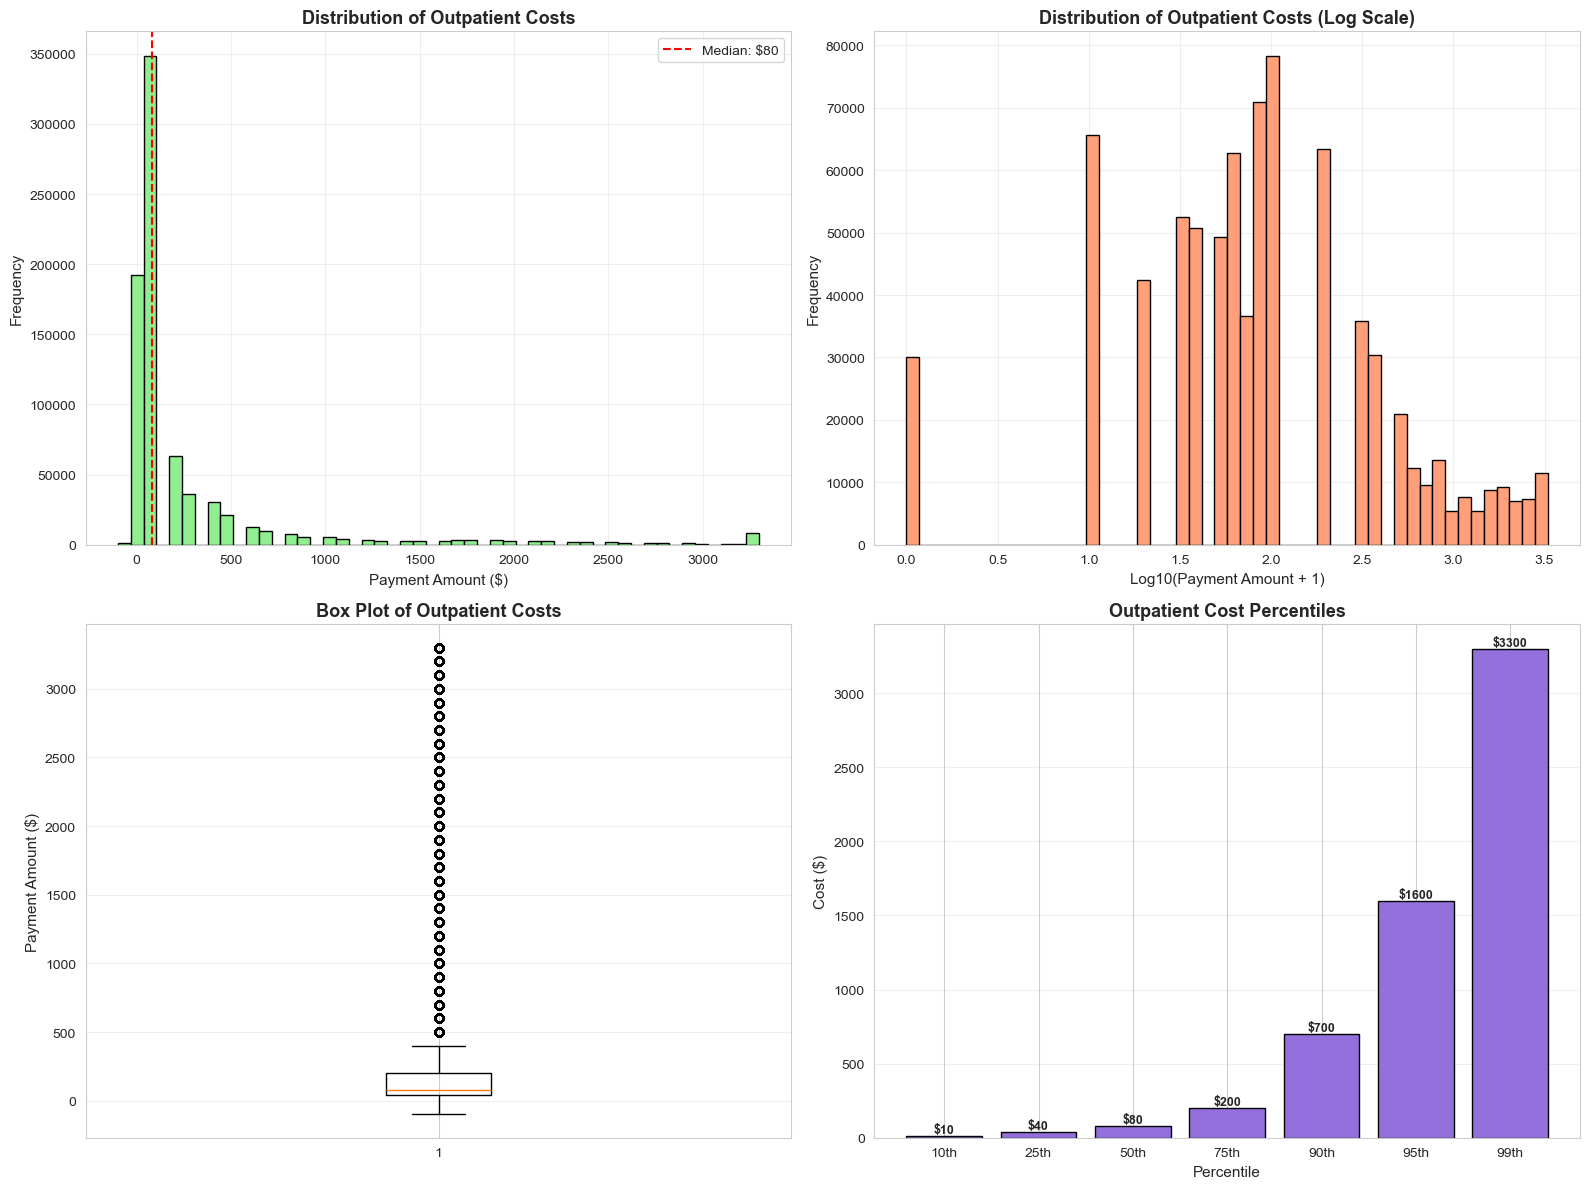

In [18]:
# Outpatient cost distribution
if 'CLM_PMT_AMT' in df_clean.columns:
    print("\n💰 OUTPATIENT COST ANALYSIS")
    print("="*100)
    
    cost_stats = df_clean['CLM_PMT_AMT'].describe()
    print(f"\nPayment Amount Statistics:")
    print(f"   Mean: ${cost_stats['mean']:,.2f}")
    print(f"   Median: ${cost_stats['50%']:,.2f}")
    print(f"   Std Dev: ${cost_stats['std']:,.2f}")
    print(f"   Min: ${cost_stats['min']:,.2f}")
    print(f"   Max: ${cost_stats['max']:,.2f}")
    
    total_spending = df_clean['CLM_PMT_AMT'].sum()
    print(f"\n💵 Total Outpatient Spending: ${total_spending:,.2f}")
    if unique_patients > 0:
        print(f"💵 Average Spending per Patient: ${total_spending/unique_patients:,.2f}")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Distribution - normal scale
    axes[0, 0].hist(df_clean['CLM_PMT_AMT'], bins=50, edgecolor='black', color='lightgreen')
    axes[0, 0].axvline(cost_stats['50%'], color='red', linestyle='--', label=f'Median: ${cost_stats["50%"]:.0f}')
    axes[0, 0].set_xlabel('Payment Amount ($)', fontsize=11)
    axes[0, 0].set_ylabel('Frequency', fontsize=11)
    axes[0, 0].set_title('Distribution of Outpatient Costs', fontsize=13, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Distribution - log scale
    axes[0, 1].hist(np.log10(df_clean['CLM_PMT_AMT'] + 1), bins=50, edgecolor='black', color='lightsalmon')
    axes[0, 1].set_xlabel('Log10(Payment Amount + 1)', fontsize=11)
    axes[0, 1].set_ylabel('Frequency', fontsize=11)
    axes[0, 1].set_title('Distribution of Outpatient Costs (Log Scale)', fontsize=13, fontweight='bold')
    axes[0, 1].grid(alpha=0.3)
    
    # Box plot
    axes[1, 0].boxplot(df_clean['CLM_PMT_AMT'], vert=True)
    axes[1, 0].set_ylabel('Payment Amount ($)', fontsize=11)
    axes[1, 0].set_title('Box Plot of Outpatient Costs', fontsize=13, fontweight='bold')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Cost percentiles
    percentiles = [10, 25, 50, 75, 90, 95, 99]
    percentile_values = [df_clean['CLM_PMT_AMT'].quantile(p/100) for p in percentiles]
    axes[1, 1].bar(range(len(percentiles)), percentile_values, color='mediumpurple', edgecolor='black')
    axes[1, 1].set_xticks(range(len(percentiles)))
    axes[1, 1].set_xticklabels([f'{p}th' for p in percentiles])
    axes[1, 1].set_xlabel('Percentile', fontsize=11)
    axes[1, 1].set_ylabel('Cost ($)', fontsize=11)
    axes[1, 1].set_title('Outpatient Cost Percentiles', fontsize=13, fontweight='bold')
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    for i, v in enumerate(percentile_values):
        axes[1, 1].text(i, v, f'${v:.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

### 4.3 Diagnosis Analysis

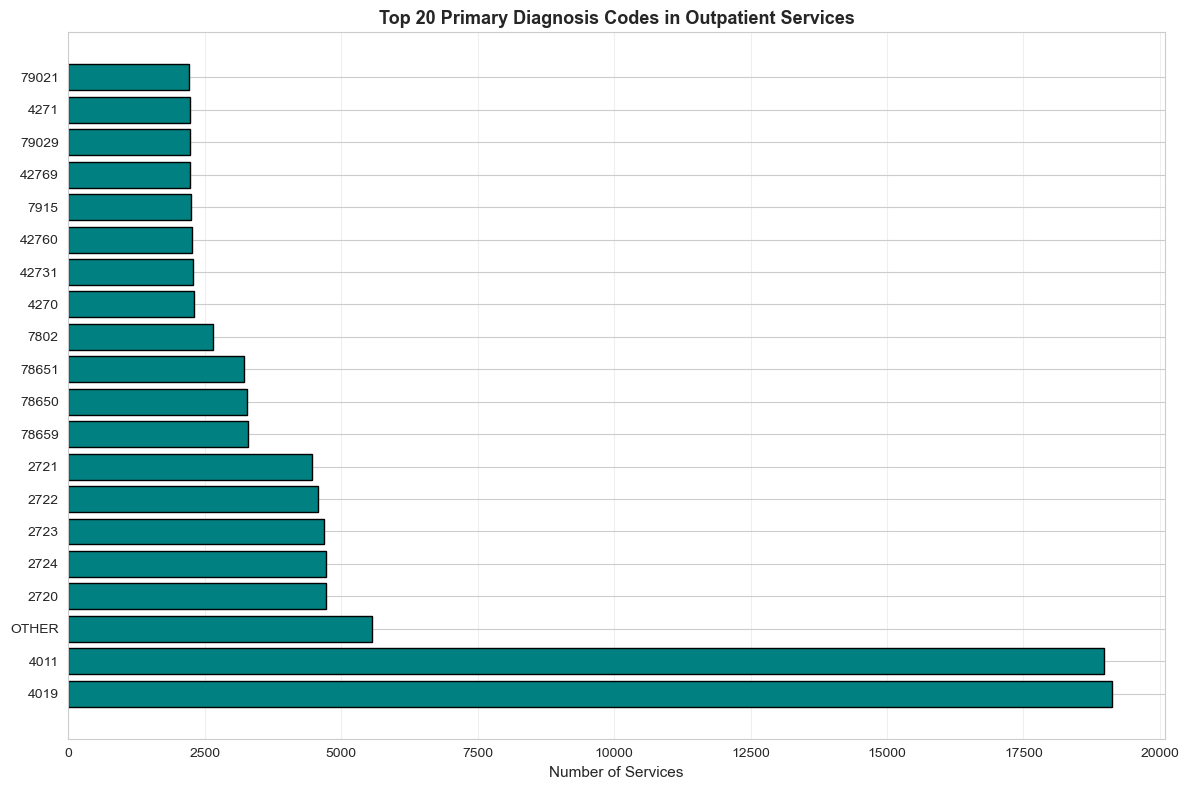


🏥 Top 10 Primary Diagnoses:
ICD9_DGNS_CD_1
4019     19131
4011     18983
OTHER     5564
2720      4716
2724      4712
2723      4679
2722      4571
2721      4472
78659     3285
78650     3274
Name: count, dtype: int64


In [19]:
# Primary diagnosis analysis
if 'ICD9_DGNS_CD_1' in df_clean.columns:
    top_diagnoses = df_clean['ICD9_DGNS_CD_1'].value_counts().head(20)
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(top_diagnoses)), top_diagnoses.values, color='teal', edgecolor='black')
    plt.yticks(range(len(top_diagnoses)), top_diagnoses.index, fontsize=10)
    plt.xlabel('Number of Services', fontsize=11)
    plt.title('Top 20 Primary Diagnosis Codes in Outpatient Services', fontsize=13, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n🏥 Top 10 Primary Diagnoses:")
    print(top_diagnoses.head(10))

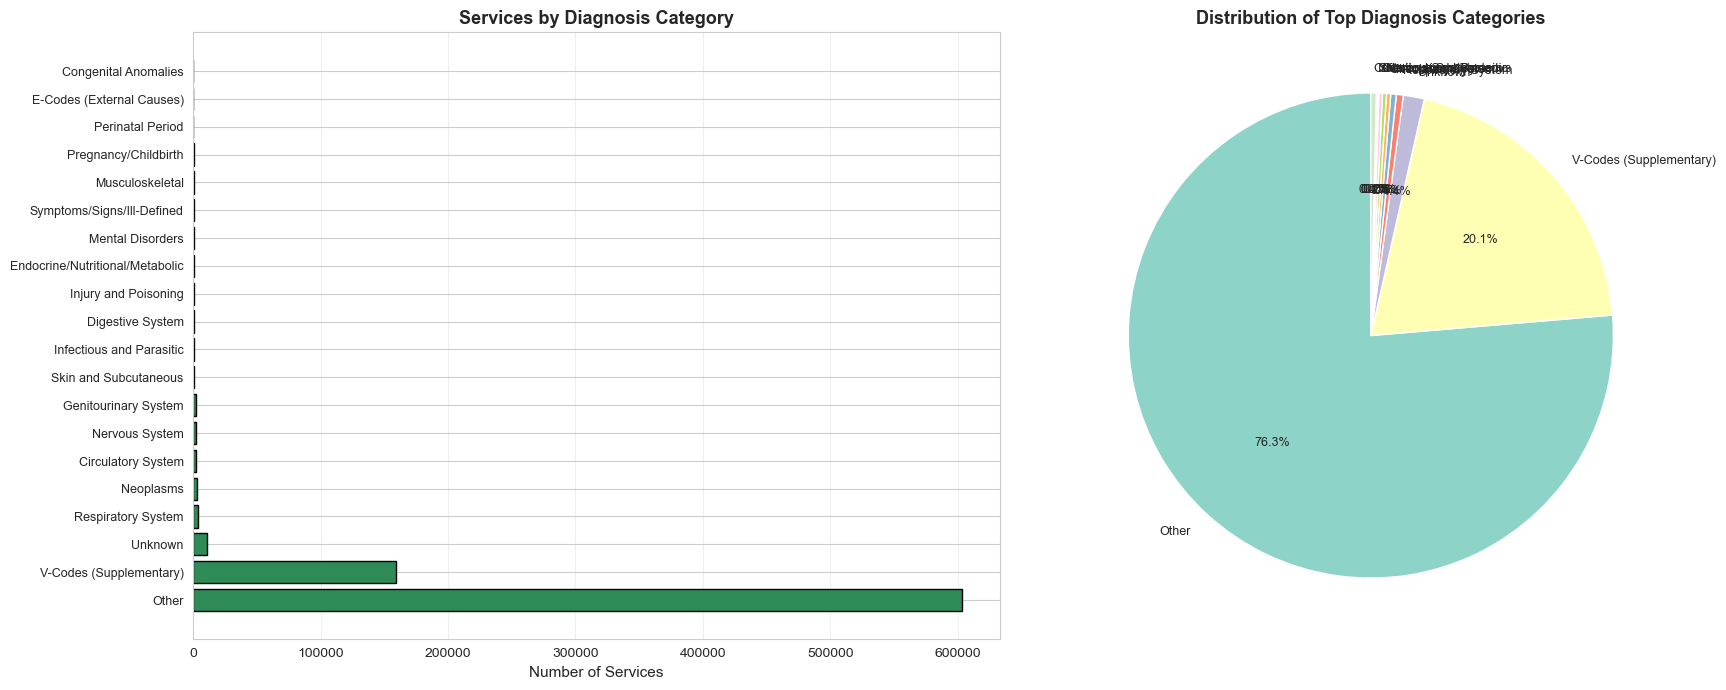

In [20]:
# Diagnosis category distribution
if 'PRIMARY_DIAGNOSIS_CATEGORY' in df_clean.columns:
    category_counts = df_clean['PRIMARY_DIAGNOSIS_CATEGORY'].value_counts()
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    # Bar chart
    axes[0].barh(range(len(category_counts)), category_counts.values, color='seagreen', edgecolor='black')
    axes[0].set_yticks(range(len(category_counts)))
    axes[0].set_yticklabels(category_counts.index, fontsize=9)
    axes[0].set_xlabel('Number of Services', fontsize=11)
    axes[0].set_title('Services by Diagnosis Category', fontsize=13, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Pie chart for top categories
    top_categories = category_counts.head(10)
    other_count = category_counts.iloc[10:].sum()
    if other_count > 0:
        pie_data = pd.concat([top_categories, pd.Series({'Other': other_count})])
    else:
        pie_data = top_categories
    
    colors = plt.cm.Set3(range(len(pie_data)))
    axes[1].pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', 
                startangle=90, colors=colors, textprops={'fontsize': 9})
    axes[1].set_title('Distribution of Top Diagnosis Categories', fontsize=13, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

### 4.4 Cost by Diagnosis Category

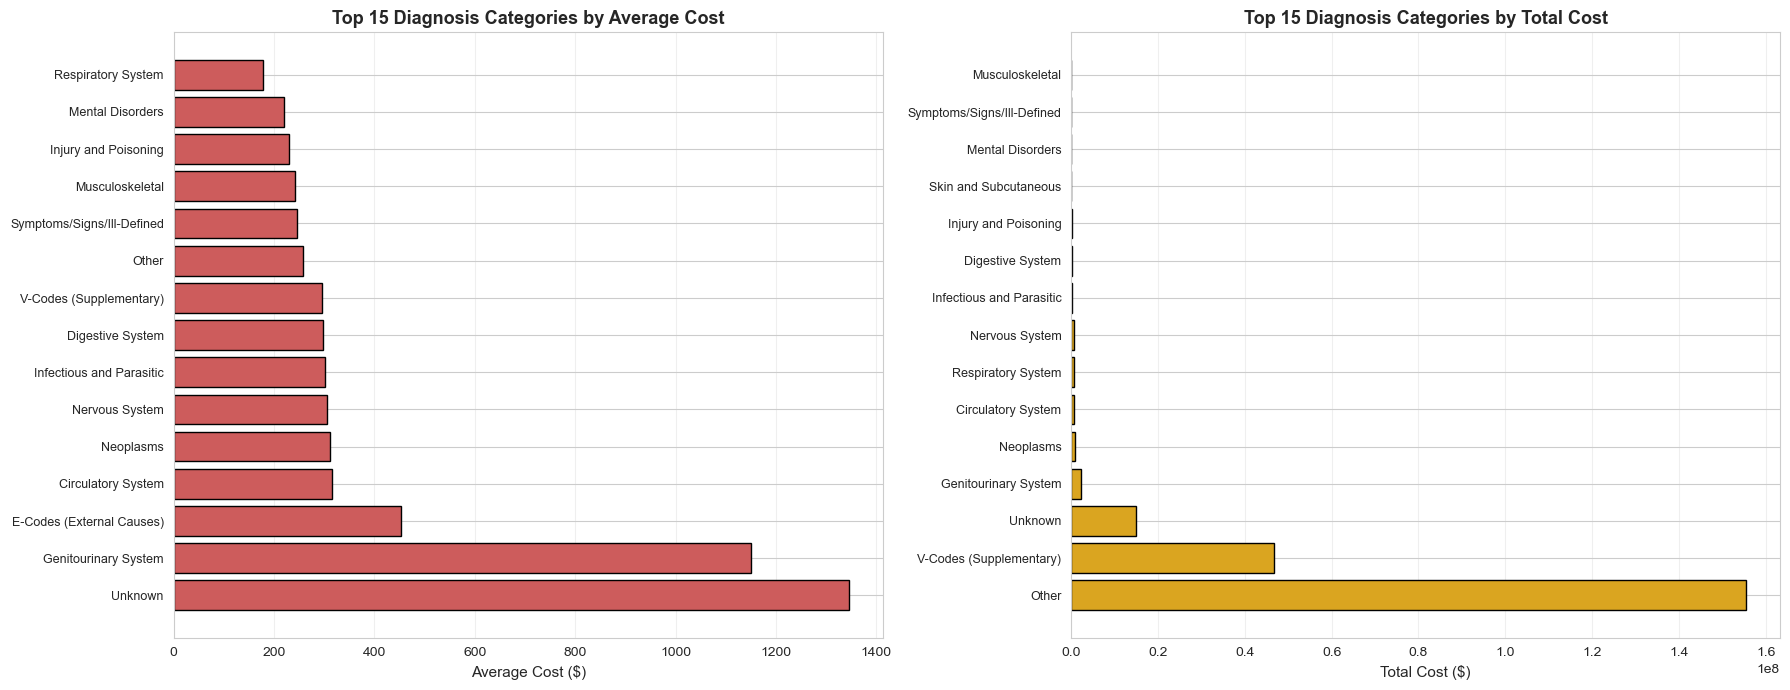


💰 Cost Statistics by Diagnosis Category:
                                   mean  median          sum   count
PRIMARY_DIAGNOSIS_CATEGORY                                          
Unknown                     1345.273515  1500.0   14902940.0   11078
Genitourinary System        1150.560209   700.0    2197570.0    1910
E-Codes (External Causes)    452.978723   400.0      21290.0      47
Circulatory System           315.252025    90.0     700490.0    2222
Neoplasms                    311.328312    60.0     909390.0    2921
Nervous System               306.625298    80.0     642380.0    2095
Infectious and Parasitic     302.190016    80.0     187660.0     621
Digestive System             297.475728    80.0     183840.0     618
V-Codes (Supplementary)      294.906945    60.0   46856290.0  158885
Other                        257.803562    80.0  155497570.0  603163
Symptoms/Signs/Ill-Defined   245.859649    90.0      70070.0     285
Musculoskeletal              242.681992    80.0      63340.0 

In [21]:
# Cost analysis by diagnosis category
if all(col in df_clean.columns for col in ['PRIMARY_DIAGNOSIS_CATEGORY', 'CLM_PMT_AMT']):
    category_costs = df_clean.groupby('PRIMARY_DIAGNOSIS_CATEGORY')['CLM_PMT_AMT'].agg(
        ['mean', 'median', 'sum', 'count']
    ).sort_values('mean', ascending=False).head(15)
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    # Average cost by category
    axes[0].barh(range(len(category_costs)), category_costs['mean'], color='indianred', edgecolor='black')
    axes[0].set_yticks(range(len(category_costs)))
    axes[0].set_yticklabels(category_costs.index, fontsize=9)
    axes[0].set_xlabel('Average Cost ($)', fontsize=11)
    axes[0].set_title('Top 15 Diagnosis Categories by Average Cost', fontsize=13, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Total cost by category
    category_total = df_clean.groupby('PRIMARY_DIAGNOSIS_CATEGORY')['CLM_PMT_AMT'].sum().sort_values(ascending=False).head(15)
    axes[1].barh(range(len(category_total)), category_total.values, color='goldenrod', edgecolor='black')
    axes[1].set_yticks(range(len(category_total)))
    axes[1].set_yticklabels(category_total.index, fontsize=9)
    axes[1].set_xlabel('Total Cost ($)', fontsize=11)
    axes[1].set_title('Top 15 Diagnosis Categories by Total Cost', fontsize=13, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n💰 Cost Statistics by Diagnosis Category:")
    print(category_costs)

### 4.5 Temporal Analysis


📅 TEMPORAL PATTERNS


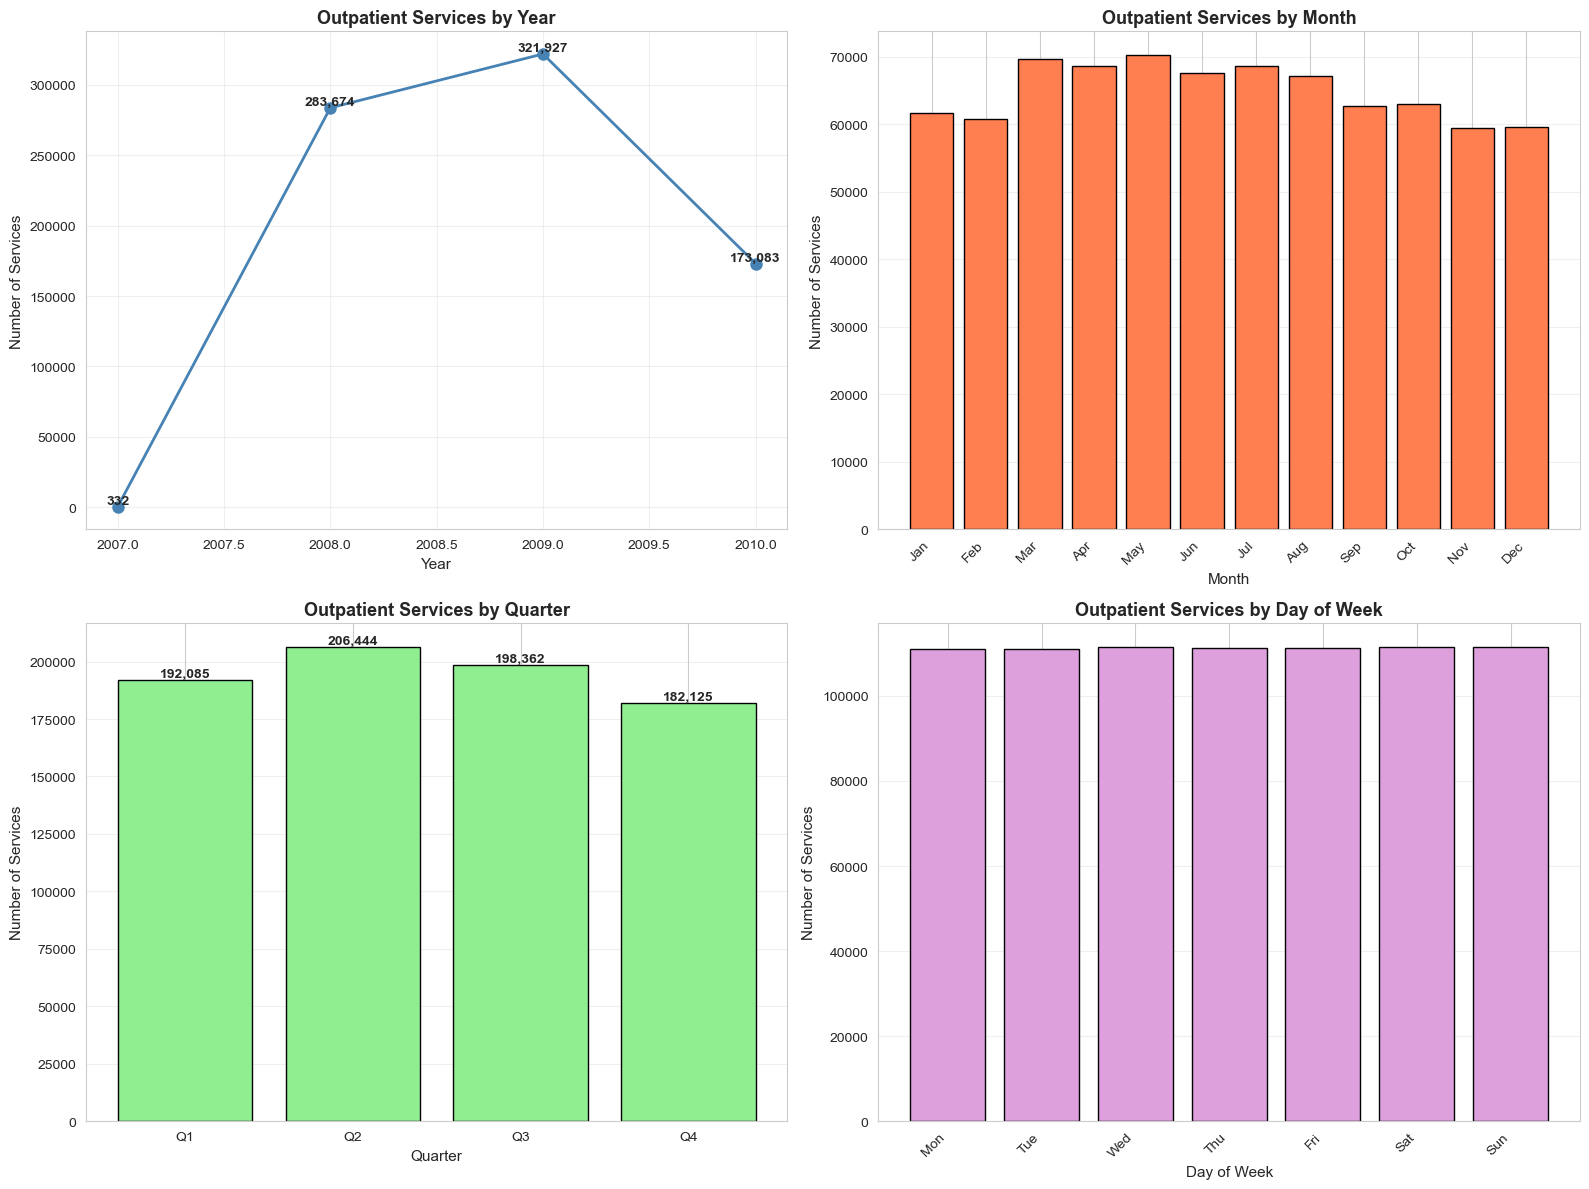

In [22]:
# Temporal patterns
if 'CLM_FROM_DT' in df_clean.columns and df_clean['CLM_FROM_DT'].notna().any():
    print("\n📅 TEMPORAL PATTERNS")
    print("="*100)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Services by year
    if 'SERVICE_YEAR' in df_clean.columns:
        yearly_services = df_clean['SERVICE_YEAR'].value_counts().sort_index()
        axes[0, 0].plot(yearly_services.index, yearly_services.values, marker='o', 
                        linewidth=2, markersize=8, color='steelblue')
        axes[0, 0].set_xlabel('Year', fontsize=11)
        axes[0, 0].set_ylabel('Number of Services', fontsize=11)
        axes[0, 0].set_title('Outpatient Services by Year', fontsize=13, fontweight='bold')
        axes[0, 0].grid(alpha=0.3)
        
        for i, v in enumerate(yearly_services.values):
            axes[0, 0].text(yearly_services.index[i], v, f'{v:,}', 
                           ha='center', va='bottom', fontweight='bold')
    
    # Services by month
    if 'SERVICE_MONTH' in df_clean.columns:
        monthly_services = df_clean['SERVICE_MONTH'].value_counts().sort_index()
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        axes[0, 1].bar(range(1, 13), [monthly_services.get(i, 0) for i in range(1, 13)], 
                       color='coral', edgecolor='black')
        axes[0, 1].set_xticks(range(1, 13))
        axes[0, 1].set_xticklabels(month_names, rotation=45, ha='right')
        axes[0, 1].set_xlabel('Month', fontsize=11)
        axes[0, 1].set_ylabel('Number of Services', fontsize=11)
        axes[0, 1].set_title('Outpatient Services by Month', fontsize=13, fontweight='bold')
        axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Services by quarter
    if 'SERVICE_QUARTER' in df_clean.columns:
        quarterly_services = df_clean['SERVICE_QUARTER'].value_counts().sort_index()
        axes[1, 0].bar(quarterly_services.index, quarterly_services.values, 
                       color='lightgreen', edgecolor='black')
        axes[1, 0].set_xticks([1, 2, 3, 4])
        axes[1, 0].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
        axes[1, 0].set_xlabel('Quarter', fontsize=11)
        axes[1, 0].set_ylabel('Number of Services', fontsize=11)
        axes[1, 0].set_title('Outpatient Services by Quarter', fontsize=13, fontweight='bold')
        axes[1, 0].grid(axis='y', alpha=0.3)
        
        for i, v in enumerate(quarterly_services.values):
            axes[1, 0].text(quarterly_services.index[i], v, f'{v:,}', 
                           ha='center', va='bottom', fontweight='bold')
    
    # Services by day of week
    if 'SERVICE_DAY_OF_WEEK' in df_clean.columns:
        dow_services = df_clean['SERVICE_DAY_OF_WEEK'].value_counts().sort_index()
        dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        axes[1, 1].bar(range(7), [dow_services.get(i, 0) for i in range(7)], 
                       color='plum', edgecolor='black')
        axes[1, 1].set_xticks(range(7))
        axes[1, 1].set_xticklabels(dow_names, rotation=45, ha='right')
        axes[1, 1].set_xlabel('Day of Week', fontsize=11)
        axes[1, 1].set_ylabel('Number of Services', fontsize=11)
        axes[1, 1].set_title('Outpatient Services by Day of Week', fontsize=13, fontweight='bold')
        axes[1, 1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### 4.6 Provider Analysis

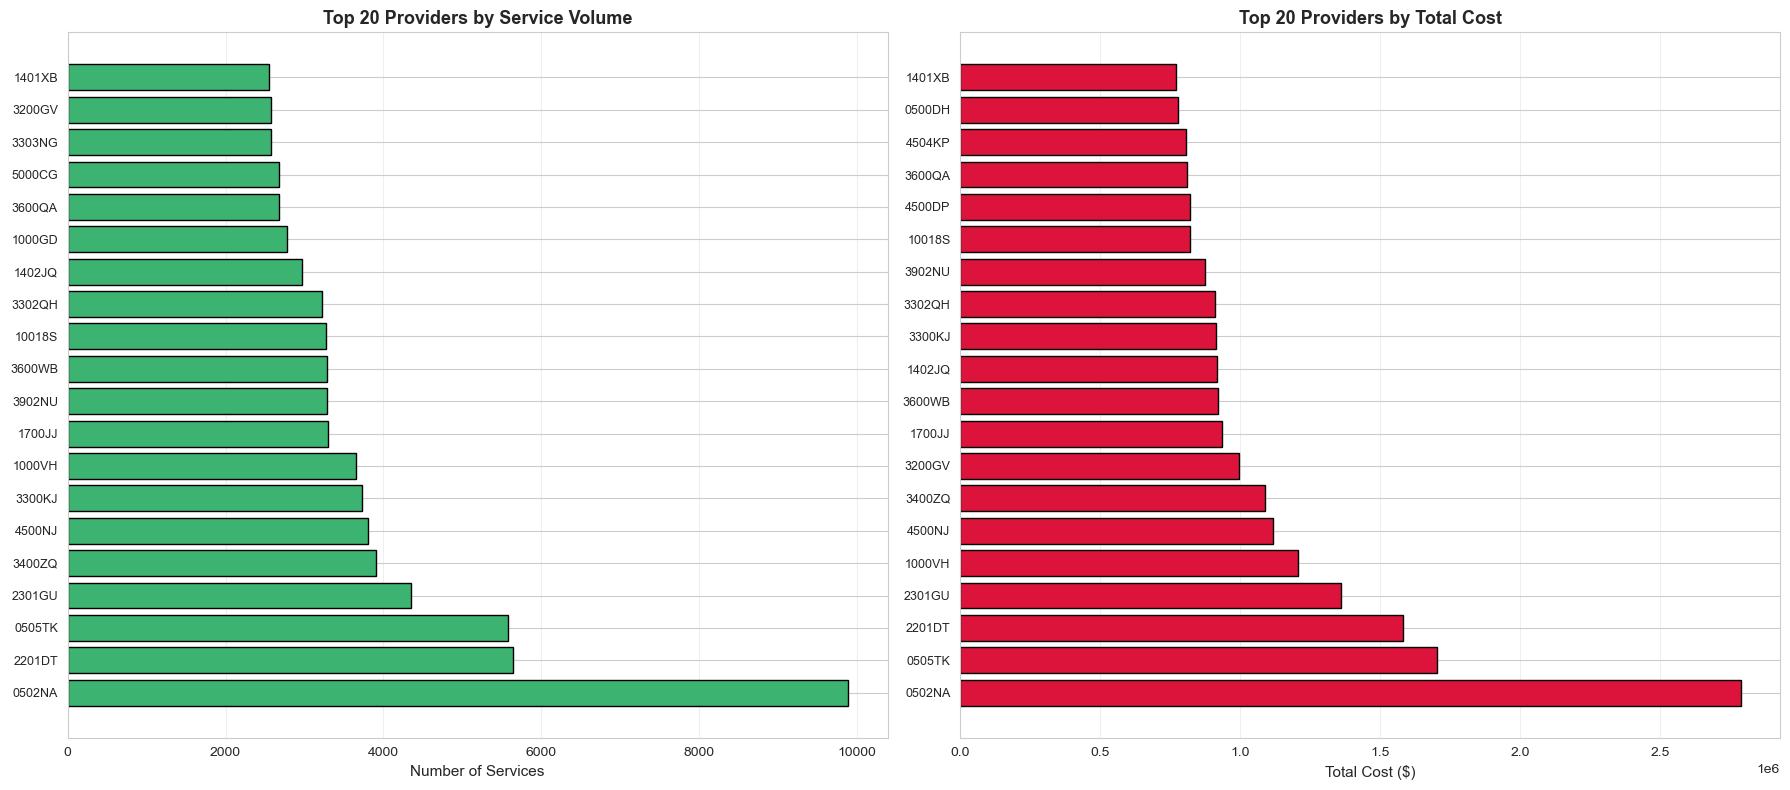

In [23]:
# Top providers by volume and cost
if 'PRVDR_NUM' in df_clean.columns:
    top_providers = df_clean['PRVDR_NUM'].value_counts().head(20)
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # Top providers by volume
    axes[0].barh(range(len(top_providers)), top_providers.values, color='mediumseagreen', edgecolor='black')
    axes[0].set_yticks(range(len(top_providers)))
    axes[0].set_yticklabels(top_providers.index, fontsize=9)
    axes[0].set_xlabel('Number of Services', fontsize=11)
    axes[0].set_title('Top 20 Providers by Service Volume', fontsize=13, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Top providers by total cost
    if 'CLM_PMT_AMT' in df_clean.columns:
        provider_costs = df_clean.groupby('PRVDR_NUM')['CLM_PMT_AMT'].sum().sort_values(ascending=False).head(20)
        axes[1].barh(range(len(provider_costs)), provider_costs.values, color='crimson', edgecolor='black')
        axes[1].set_yticks(range(len(provider_costs)))
        axes[1].set_yticklabels(provider_costs.index, fontsize=9)
        axes[1].set_xlabel('Total Cost ($)', fontsize=11)
        axes[1].set_title('Top 20 Providers by Total Cost', fontsize=13, fontweight='bold')
        axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### 4.7 Service Complexity Analysis

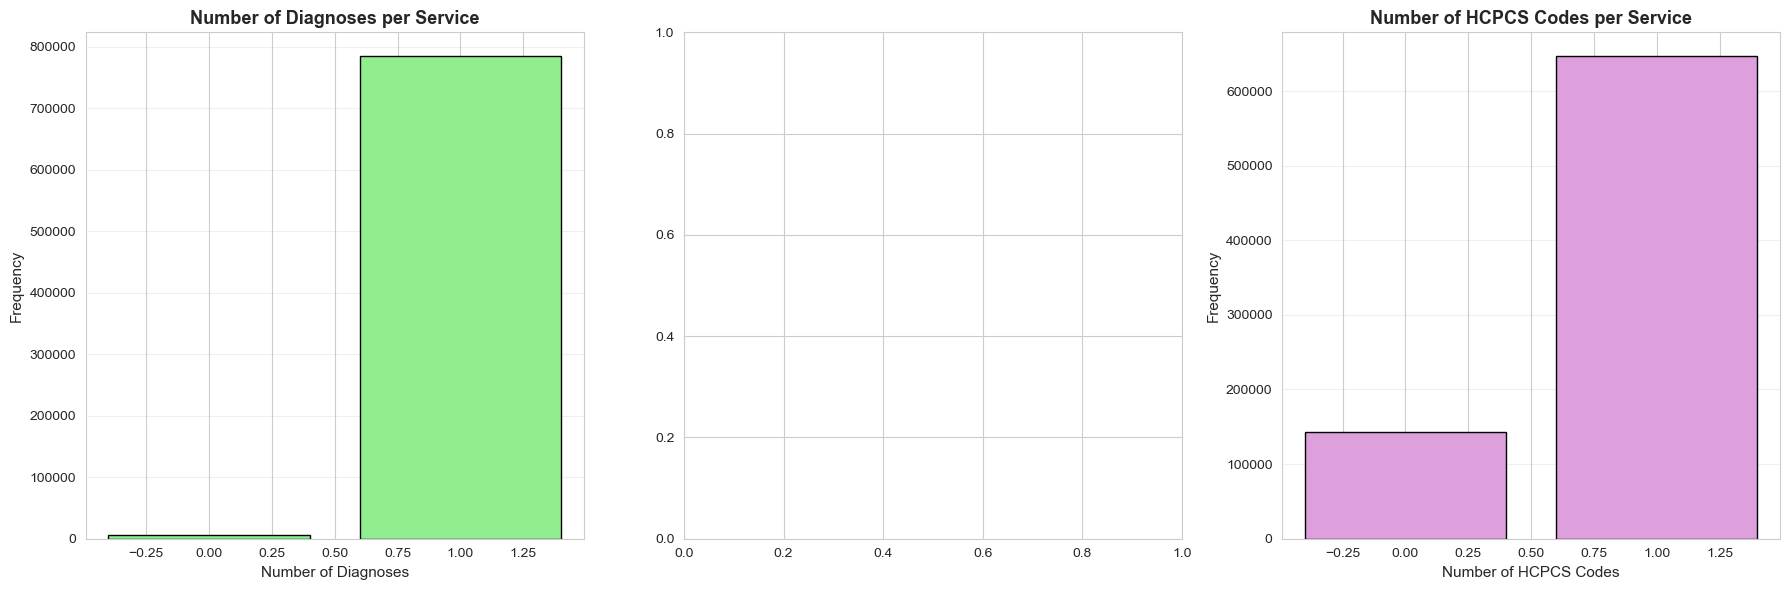

In [24]:
# Number of diagnoses and procedures per service
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Number of diagnoses
if 'NUM_DIAGNOSES' in df_clean.columns:
    diag_counts = df_clean['NUM_DIAGNOSES'].value_counts().sort_index()
    axes[0].bar(diag_counts.index, diag_counts.values, color='lightgreen', edgecolor='black')
    axes[0].set_xlabel('Number of Diagnoses', fontsize=11)
    axes[0].set_ylabel('Frequency', fontsize=11)
    axes[0].set_title('Number of Diagnoses per Service', fontsize=13, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)

# Number of procedures
if 'NUM_PROCEDURES' in df_clean.columns:
    proc_counts = df_clean['NUM_PROCEDURES'].value_counts().sort_index()
    axes[1].bar(proc_counts.index, proc_counts.values, color='lightsalmon', edgecolor='black')
    axes[1].set_xlabel('Number of Procedures', fontsize=11)
    axes[1].set_ylabel('Frequency', fontsize=11)
    axes[1].set_title('Number of Procedures per Service', fontsize=13, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)

# Number of HCPCS codes
if 'NUM_HCPCS_CODES' in df_clean.columns:
    hcpcs_counts = df_clean['NUM_HCPCS_CODES'].value_counts().sort_index()
    axes[2].bar(hcpcs_counts.index, hcpcs_counts.values, color='plum', edgecolor='black')
    axes[2].set_xlabel('Number of HCPCS Codes', fontsize=11)
    axes[2].set_ylabel('Frequency', fontsize=11)
    axes[2].set_title('Number of HCPCS Codes per Service', fontsize=13, fontweight='bold')
    axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Key Insights & Findings

In [25]:
print("\n" + "="*100)
print("🎯 KEY INSIGHTS & FINDINGS")
print("="*100)

print("\n1️⃣ DATA QUALITY & CLEANING:")
print(f"   • Removed {len(columns_to_remove)} columns with >30% missing data")
print(f"   • Fixed scientific notation in Claim IDs")
print(f"   • Converted integer dates to datetime format")
print(f"   • Created {df_clean.shape[1] - (df.shape[1] - len(columns_to_remove))} derived features")

print("\n2️⃣ SERVICE VOLUME PATTERNS:")
print(f"   • Total outpatient services: {total_services:,}")
if unique_patients > 0:
    print(f"   • Average services per patient: {total_services/unique_patients:.2f}")
    print(f"   • Top 10% of patients account for significant service volume")
if 'IS_SAME_DAY_SERVICE' in df_clean.columns:
    same_day_pct = df_clean['IS_SAME_DAY_SERVICE'].mean() * 100
    print(f"   • {same_day_pct:.1f}% are same-day services (typical for outpatient care)")

print("\n3️⃣ COST PATTERNS:")
if 'CLM_PMT_AMT' in df_clean.columns:
    median_cost = df_clean['CLM_PMT_AMT'].median()
    mean_cost = df_clean['CLM_PMT_AMT'].mean()
    print(f"   • Median outpatient cost: ${median_cost:.2f}")
    print(f"   • Mean outpatient cost: ${mean_cost:.2f}")
    print(f"   • Outpatient costs are typically LOWER than inpatient")
    print(f"   • Distribution is right-skewed (complex procedures drive up mean)")

print("\n4️⃣ DIAGNOSIS PATTERNS:")
if 'PRIMARY_DIAGNOSIS_CATEGORY' in df_clean.columns:
    top_category = df_clean['PRIMARY_DIAGNOSIS_CATEGORY'].value_counts().index[0]
    print(f"   • Most common diagnosis category: {top_category}")
    print(f"   • Outpatient services cover wide range of conditions")
    print(f"   • Includes preventive care (V-codes) and routine monitoring")

print("\n5️⃣ TEMPORAL INSIGHTS:")
if 'SERVICE_MONTH' in df_clean.columns:
    monthly_services = df_clean['SERVICE_MONTH'].value_counts().sort_index()
    peak_month = monthly_services.idxmax()
    month_names = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
                   7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
    print(f"   • Peak service month: {month_names.get(peak_month, peak_month)}")
    print(f"   • Seasonal patterns reflect routine care cycles")
if 'SERVICE_DAY_OF_WEEK' in df_clean.columns:
    weekend_services = df_clean[df_clean['SERVICE_DAY_OF_WEEK'].isin([5, 6])]
    weekend_pct = len(weekend_services) / len(df_clean) * 100
    print(f"   • Weekend services: {weekend_pct:.1f}% (limited access compared to weekdays)")

print("\n6️⃣ PROVIDER PATTERNS:")
if unique_providers > 0:
    print(f"   • {unique_providers:,} unique outpatient providers")
    print(f"   • Provider network is diverse (clinics, labs, imaging centers, etc.)")
    print(f"   • Top providers handle significant service volume")

print("\n7️⃣ SERVICE COMPLEXITY:")
if 'NUM_DIAGNOSES' in df_clean.columns:
    avg_diagnoses = df_clean['NUM_DIAGNOSES'].mean()
    print(f"   • Average diagnoses per service: {avg_diagnoses:.2f}")
if 'NUM_HCPCS_CODES' in df_clean.columns:
    avg_hcpcs = df_clean['NUM_HCPCS_CODES'].mean()
    print(f"   • Average HCPCS codes per service: {avg_hcpcs:.2f}")
    print(f"   • HCPCS codes represent specific outpatient procedures and services")

print("\n" + "="*100)


🎯 KEY INSIGHTS & FINDINGS

1️⃣ DATA QUALITY & CLEANING:
   • Removed 62 columns with >30% missing data
   • Fixed scientific notation in Claim IDs
   • Converted integer dates to datetime format
   • Created 15 derived features

2️⃣ SERVICE VOLUME PATTERNS:
   • Total outpatient services: 790,044
   • Average services per patient: 9.28
   • Top 10% of patients account for significant service volume
   • 86.7% are same-day services (typical for outpatient care)

3️⃣ COST PATTERNS:
   • Median outpatient cost: $80.00
   • Mean outpatient cost: $282.60
   • Outpatient costs are typically LOWER than inpatient
   • Distribution is right-skewed (complex procedures drive up mean)

4️⃣ DIAGNOSIS PATTERNS:
   • Most common diagnosis category: Other
   • Outpatient services cover wide range of conditions
   • Includes preventive care (V-codes) and routine monitoring

5️⃣ TEMPORAL INSIGHTS:
   • Peak service month: May
   • Seasonal patterns reflect routine care cycles
   • Weekend services: 28.

## 6. Actionable Recommendations

In [26]:
print("\n" + "="*100)
print("🎯 ACTIONABLE RECOMMENDATIONS")
print("="*100)

print("\n1️⃣ PREVENTIVE CARE OPTIMIZATION:")
print("   ✓ Promote preventive services (screenings, vaccinations, wellness visits)")
print("   ✓ Target patients who haven't had preventive care in 12+ months")
print("   ✓ Preventive care reduces downstream inpatient costs")

print("\n2️⃣ HIGH UTILIZER MANAGEMENT:")
print("   ✓ Identify top 10% of outpatient service users")
print("   ✓ Assess for chronic disease management needs")
print("   ✓ Coordinate care to reduce redundant services")
print("   ✓ Consider care management programs")

print("\n3️⃣ COST CONTAINMENT STRATEGIES:")
print("   ✓ Review high-cost outpatient procedures for appropriateness")
print("   ✓ Promote use of lower-cost settings (e.g., free-standing clinics vs hospital outpatient)")
print("   ✓ Implement prior authorization for expensive imaging and procedures")
print("   ✓ Negotiate volume discounts with high-volume providers")

print("\n4️⃣ ACCESS & AVAILABILITY:")
print("   ✓ Increase weekend/evening appointments to improve access")
print("   ✓ Reduce wait times for routine services")
print("   ✓ Expand telehealth for appropriate visits (follow-ups, routine monitoring)")
print("   ✓ Balance provider network across geographic areas")

print("\n5️⃣ DATA QUALITY IMPROVEMENTS:")
print("   ✓ Address missing data issues in remaining columns (<30% threshold)")
print("   ✓ Standardize coding practices across providers")
print("   ✓ Implement real-time data validation")
print("   ✓ Regular audits of zero-cost and negative-cost claims")

print("\n6️⃣ PREDICTIVE ANALYTICS OPPORTUNITIES:")
print("   ✓ Predict patients at risk of high outpatient utilization")
print("   ✓ Identify patients likely to benefit from preventive interventions")
print("   ✓ Forecast seasonal service demand for resource planning")
print("   ✓ Detect potentially avoidable emergency room visits")

print("\n" + "="*100)


🎯 ACTIONABLE RECOMMENDATIONS

1️⃣ PREVENTIVE CARE OPTIMIZATION:
   ✓ Promote preventive services (screenings, vaccinations, wellness visits)
   ✓ Target patients who haven't had preventive care in 12+ months
   ✓ Preventive care reduces downstream inpatient costs

2️⃣ HIGH UTILIZER MANAGEMENT:
   ✓ Identify top 10% of outpatient service users
   ✓ Assess for chronic disease management needs
   ✓ Coordinate care to reduce redundant services
   ✓ Consider care management programs

3️⃣ COST CONTAINMENT STRATEGIES:
   ✓ Review high-cost outpatient procedures for appropriateness
   ✓ Promote use of lower-cost settings (e.g., free-standing clinics vs hospital outpatient)
   ✓ Implement prior authorization for expensive imaging and procedures
   ✓ Negotiate volume discounts with high-volume providers

4️⃣ ACCESS & AVAILABILITY:
   ✓ Increase weekend/evening appointments to improve access
   ✓ Reduce wait times for routine services
   ✓ Expand telehealth for appropriate visits (follow-ups, ro

## 7. Export Cleaned Data

In [27]:
# Save cleaned dataset
output_file = 'CMS_Outpatient_Claims_CLEANED.csv'
df_clean.to_csv(output_file, index=False)

print("\n" + "="*100)
print("✅ DATA EXPORT COMPLETE")
print("="*100)
print(f"\n📁 Cleaned dataset saved to: {output_file}")
print(f"\nOriginal Dataset:")
print(f"   Rows: {df.shape[0]:,}")
print(f"   Columns: {df.shape[1]}")
print(f"\nCleaned Dataset:")
print(f"   Rows: {df_clean.shape[0]:,}")
print(f"   Columns: {df_clean.shape[1]}")
print(f"\nChanges:")
print(f"   Columns removed (>30% missing): {len(columns_to_remove)}")
print(f"   New derived features: {df_clean.shape[1] - (df.shape[1] - len(columns_to_remove))}")
print(f"   Rows removed: 0 (no row-level filtering)")

print("\n✅ Analysis complete! Dataset is ready for modeling.")


✅ DATA EXPORT COMPLETE

📁 Cleaned dataset saved to: CMS_Outpatient_Claims_CLEANED.csv

Original Dataset:
   Rows: 790,044
   Columns: 76

Cleaned Dataset:
   Rows: 790,044
   Columns: 29

Changes:
   Columns removed (>30% missing): 62
   New derived features: 15
   Rows removed: 0 (no row-level filtering)

✅ Analysis complete! Dataset is ready for modeling.


---

## 📋 Executive Summary

### ✅ Comprehensive Data Cleaning Performed:
- **Removed columns with >30% missing data** (per user requirement)
- Fixed scientific notation in Claim IDs
- Converted date formats from integers to datetime
- Created outpatient-specific derived features
- Categorized diagnosis codes into clinical categories

### 📊 Thorough EDA Conducted:
- **Service Volume Analysis:** Patient utilization patterns, high utilizers
- **Cost Analysis:** Distribution, percentiles, outliers
- **Diagnosis Analysis:** Top conditions, category distributions
- **Cost-Diagnosis Relationships:** Which conditions drive costs
- **Temporal Analysis:** Seasonal patterns, day-of-week effects
- **Provider Analysis:** Volume and cost leaders
- **Service Complexity:** Multiple diagnoses, procedures, HCPCS codes

### 💡 Key Outpatient Insights:
1. **Outpatient services are typically same-day** (doctor visits, tests, procedures)
2. **Lower cost per service than inpatient** but higher volume
3. **Preventive care opportunities** (V-codes analysis)
4. **High utilizers** drive significant service volume
5. **Seasonal patterns** reflect routine care cycles
6. **Weekend access** is limited compared to weekdays
7. **HCPCS codes** reveal specific outpatient procedures

### 🎯 Actionable Recommendations:
1. **Preventive Care:** Promote screenings and wellness visits
2. **High Utilizers:** Implement care coordination programs
3. **Cost Containment:** Review high-cost procedures, promote lower-cost settings
4. **Access:** Expand telehealth and weekend appointments
5. **Data Quality:** Standardize coding, implement validation
6. **Predictive Analytics:** Forecast demand, identify at-risk patients

---

### Next Steps:
1. Build predictive models for high utilizers
2. Develop preventive care outreach programs
3. Analyze cost efficiency by provider
4. Create dashboards for operational monitoring
5. Compare outpatient vs inpatient cost-effectiveness